# A_Task

### 1)Описание:

Есть 100 значений некоторой абстрактной переменной, по которым была обучена модель. Затем была посчитана среднеквадратическая ошибка (MSE). Для 80 случаев разница истинного и предсказанного значения составляет 0,5, а для остальных 20 случаев равняется -0,3. Вы знаете, что модель была обучена неверно. Если добавить к ответам модели некоторую константу C, то результат улучшится. Существует ли такая константа? Если да, найдите её.

Небольшое замечание: Условия можно понять неодназначно, вы явно указываете что посчитали MSE на всех данных, но указание об отрицательном выходе могут спутать слегка. Я понимаю что MSE не может выдавать отрицательных значений, но кто-то из участнников мог запутаться. Как я понял вашу задачу:

У нас есть некий датасет, и нам сказано что разница выхода из нашей сети и лейбла для первых 80 составляет 0.5, а для остальных 20 0.3. Сам первичный MSE нам не дан и нас просят найти константу, которую мы можем подставить в формулу mse, а конкретнее, в сумму перед возведением в квадрат, причем такую константу, которая улучшит mse_score

### Решение:

Ответ: Да, существует и ее примерное значение будет равно: -0.332 

В качестве доказательства ответа я написал код, который подбирает константу для заданных значений.
В этом коде я считаю mse_score для различных значений переменной C:

mse_score without variable: 0.21639999999999998 

mse_score with varuable: 
 variable: -0.3319999999999994 
 score: 0.10617600000000003 



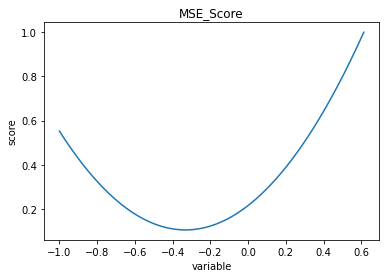

In [1]:
import matplotlib.pyplot as plt

class Iterator:
    def __init__(self, step):
        self.start = -1
        self.end = 1
        self.num = self.start
        self.step = step
        
    def __iter__(self):
        return self
    
    def __next__(self):
        if self.num < self.end:
            num = self.num
            self.num += self.step
            return num

def mse_variable_score(variable):
    new_preds = [(variable + elem)**2 for elem in preds]
    return sum(new_preds) / len(new_preds)



condition = lambda index: 0.5 if index < 79 else -0.3
preds = list(map(condition, range(100)))

answers = []
variables = []
for i in Iterator(0.001):
    if i != None:
        score = mse_variable_score(i)
        if score <= 1:
            answers.append(mse_variable_score(i))
            variables.append(i)
    else:
        break

max_elem = 0
max_score = float("inf")

for index, score in enumerate(answers):
    if score < max_score:
        max_elem = variables[index]
        max_score = score
        
print("mse_score without variable:", mse_variable_score(0),"\n")
print("mse_score with varuable:", "\n", "variable:", max_elem,
      "\n", "score:", max_score, "\n")
plt.xlabel('variable')
plt.ylabel('score')
plt.title("MSE_Score")
plt.plot(variables, answers)
plt.show()

### 2)Описание:

Существует некий временной ряд, область допустимых значений которого [0; +∞). Допустим, это количество шагов. Предположим, вы используете два алгоритма машинного обучения для построения модели, предсказывающей количество шагов в определённый день, — градиентный бустинг и случайный лес. Какой из данных алгоритмов может возвращать отрицательные значения в качестве прогнозируемых и почему?

### Решение:

Ответ: Градиентный бустинг. Дальше я постараюсь объяснить почему:


1)Для начала дам краткий ответ почему это не может быть Random Forest: Поскольку особенностью этой модели является усреднение прогнозов всех деревьев, следовательно проблемой нашей модели является скорее то, что мы можем не отследить тенденцию в данных. Так как мы усредняем значения всех выходов, мы явно не можем получить что-то на подобии отрицательных значений на датасете, состоящем из положительных чисел.

Постараюсь предомонстрировать это на примере:

![](https://i.ibb.co/2ysJ0yL/Random-Forest-Diamonds.png)

На примере показано распределение цен на алмазы. А синия линия это выходы из модели классического RandomForestRegressor, невооруженным глазом видно, что модель обобщает данные, а конкретнее, модель не регистрирует выброс выделенный красным цветом. Ниже приведу пример работы обычной линейной регрессии:

![](https://i.ibb.co/hCnTL6Z/Linear-Regression-Diamonds.png)

Как мы можем заметить, обычная линейная регрессия регестрирует этот выброс. Возможные способы решения подобной проблемы:

* Использовать  линейную модель, например Логистическую регрессию.

* Использовать глубокие модели, зачастую глубокая модель с правильной архитектурой будет лучшим решением в подобных ситуациях.

* Использовать модификацию Random Forest - RERFs.

2)Так как Gradient Boosting последовательно подгоняет деревья регрессии к остаткам предыдущего этапа обучения, можно заметить следующее: Если дерево на текущем этапе предсказывает значение, превышающее истинное значение конкретного обучающего примера, остаток на этом этапе для этого примера будет отрицательным, и поэтому дерево регрессии на следующем этапе  столкнется с отрицательными целевыми значениями. Поскольку модель складывает все эти деревья, чтобы сделать окончательный прогноз может возникнуть ситуациия, когда сумма отрицательных остатков превысит положительные выходы и мы получим отрицательный прогноз модели. Подобное часто происходит при увеличении количества решающих деревьев. Подобное поведение вполне нормально для нашей модели, в таких ситуациях не стоит волноваться, лучше подождать окончания обучения модели и сделать выводы уже после.

### 3)Описание:

Предположим, мы обучили линейную модель. Анализируя остатки модели, мы обнаружили значительную гетероскедастичность. Ваш коллега предложил использовать стандартные ошибки в форме Уайта, чтобы добиться лучшего качества модели. Снова обучили модель, однако R-квадрат остался тем же. Предложите объяснение этого явления. Приведите необходимые выкладки.

### Решение:

Я нашел решение описание этой проблемы на [англо-вики](https://en.wikipedia.org/wiki/Heteroscedasticity-consistent_standard_errors#Problem). Но моей совести не хватило на то, чтоб просто переписать приведенное там доказательство, а написать своими словами у меня не вышло, тк я не смог достаточно разобраться в статье. Было бы классно обсудить с вами эту задачу на собеседовании, хочу все же вникнуть в происходящее)

### 4)Описание:

С помощью некоторого датчика мы наблюдаем за температурой в холодильном отделении. Система должна поддерживать околонулевое значение. При поступлении нового измерения с датчика мы должны отдавать в stdout значение стандартного отклонения, рассчитанного по всей истории наблюдений.

```
stream = Stream(port=port, host=host)
while  stream.has_next():
    value = stream.next_value()
    # std calculation TBD
    print(std_value)
```
    
stream – это поток измерений с датчика, у него есть два метода:

• has_next() — проверяет, есть ли следующее значение, возвращает bool,

• next_value() — возвращает поступившее измерение, float.

Напишите код, вычисляющий стандартное отклонение при условии, что он должен работать на машине с оперативной памятью, не превышающей 100 МБ (из которых больше половины уже занято Python’ом :))

### Решение:

Поскольку у нас во время вычислений нет необходимости хранить все значения. Мы можем просто посчитать сумму всех значений и их квадратов, также количество значений, после чего воспользуемся формулой: $\sum(x^2) − n * ({\bar{x}})^2$. Для тестирования я создал class Stream и сделал проверку с помощью встроенной функции в numpy. В вычислениях в python есть небольшая погрешность, поэтому полученное значение может незначительно отличаться от настоящего(погрешность начинается с 19-го разряда после запятой.

In [24]:
from numpy.random import rand

class Stream:
    def __init__(self, port, host):
        self.port = port
        self.host = host
        self.numbers = rand((100))
        self.current_index = 0
        
    def has_next(self):
        if self.current_index < len(self.numbers):
            return True
        else:
            return False
    
    def next_value(self):
        cur_value = self.numbers[self.current_index]
        self.current_index += 1
        return cur_value

In [25]:
from math import sqrt
stream = Stream(port = "Vozmite na stazhku", host = "plez")

sum_of_values = 0
sum_of_squares = 0
number_of_values = 0

while  stream.has_next():
    
    value = stream.next_value()
    number_of_values += 1
    sum_of_values += value 
    sum_of_squares += value**2 
    
x_ = (sum_of_values / number_of_values)**2
print(sqrt((sum_of_squares - number_of_values * x_) /100))


0.2925751832045944


In [26]:
import numpy as np

print("\n", np.std(stream.numbers))


 0.2925751832045948


### 5) Описание:

Некоторая система выполняет задачи и записывает результат выполнения в таблицу следующего вида:
![](https://sun9-40.userapi.com/impg/XddTgmpXt22HkRNgq7WmXwSjFYfE0c7HQxG_CA/lBi440ZcUkc.jpg?size=807x324&quality=96&sign=0909ea3b8e7967dbcab84af4c7120f5c&type=album)


Если задача не была выполнена (упала), то соответствующий ей task_id не записывается в таблицу, а увеличивается на число, равное количеству изначально запланированных задач. После этого система снова пытается выполнить задачу и записать результат в таблицу. Количество попыток ограничено. Если в итоге задача не будет выполнена, то весь процесс выполнения задач приостанавливается.

Предположим, мы запланировали запись 100 задач. Если в процессе работы задача № 67 упадет (task_id = 67), то запись не произойдёт, а её номер увеличится на 100. Затем задача перезапустится с новым номером — 167. Если же и она упадёт, то произойдёт ещё одно увеличение переменной task_id на 100, и т. д.

Ваша задача состоит в том, чтобы написать SQL-запрос к таблице выше, который вернёт изначальные task_id всех задач, что не смогли завершиться с первой попытки.

### Решение:

Прежде чем писать запрос я решил для начала написать псевдокод(он работает, хоть и не является полноценной дб) того, как могла бы работать система из тз:

In [38]:
from time import ctime

class System:
    
    def __init__(self, number_of_task):
        self.number_of_task = number_of_task
        self.tasks = {}
        self.failed_tasks = []
        self.last_task = 0
        
    def update_new_task(self, task_id = 0):
        if self.last_task == task_id - 1:
            self.tasks.update({task_id : ctime()})
            self.last_task = task_id
        elif self.last_task == task_id - self.number_of_task:
            self.tasks.update({task_id + self.number_of_task: ctime})
            self.failed_tasks.append(task_id)
            self.last_task = task_id
        else:
            raise NameError("Failed task")
    
    def get_f_task(self):
        return self.failed_tasks


### Откровенно говоря, я довольно плохо знаю sql, наверное просто не было возможности его выучить) Надеюсь, что вы мне ее предоставите :) Ниже я вставил запрос, который по моему мнению должен быть ответом на эту задачу, в свою защиту скажу, что я изучал sqlite всего лишь 2 часа:

```
WITH 
	id_count(id, amount) 
AS
(
	SELECT
  		task_id AS id,
  		COUNT(*) as amount
  	FROM
  		VK
  	GROUP BY
  		task_id % 100
)

SELECT
	id
FROM
	id_count
WHERE
	amount > 1
``` 

# B_Task

### Описание:

Создан класс Task, который может выполнять некие расчёты (задачи). Статистику по выполненным расчётам собирает класс Counter. Задачи выполняются в файле main.py в несколько потоков. Но в этом коде есть баг, поэтому расчёты выполняются неверно. Сделайте ревью кода и найдите все баги, чтобы расчеты были корректными, а код понятным и стилистически правильным.

```
# main.py
from concurrent.futures import ThreadPoolExecutor
from counter import Counter
from task import Task
new_counter = Counter()
values = [2]*10
tasks = []
for value in values:
    tasks.append(Task(value))
with ThreadPoolExecutor(max_workers=2) as executor:
    for task in tasks:
        executor.submit(new_counter.update, task.execute())
print(new_counter.value)
# task.py
import time
class Task:
    def __init__(self, value):
        self.status = 'ready'
        self.value = value
    def execute(self):
        new_value = self.value**2
        self.value = new_value
        return self.value
# counter.py
import time
class Counter:
    def __init__(self):
        self.value = 0
    def update(self, new_value):
        local = self.value
        local += new_value
        time.sleep(0.1)
        self.value = local
```

### Решение:


Насколько я понимаю, у этой задачи нет какого-то конкретного и явно верного решения. Скорее это задача на то, чтоб оформить правильно код и сделать его более читабильным. Поэтому я слегка исправил классы, убрал странные и лишние действия и также придумал какую хотя бы более менее логически верную задачу этот код мог бы исполнять. Что было изменено:

1)Разбил все 3 файла на 3 отдельные ячейки, для более удобной работы с кодом в дальнейшем. Также это логически верно со стороны архитектуры, так как мы эмилируем некую разработку абстрактной программы, где сущности наших задач разбиты на классы.

2)Добавил разбиения между методами классов.

3)Я не очень понял почему в коде значения поля value у класса Task во время вызова метода update выносилось в некоторую переменную локал, а потом только к ней добавлялось значение new_value, а после все это перезаписывалось обратно в поле класса. Имхо было бы проше сразу к полю этого класса добавлять это значение, без лишних танцев с бубном и переменной local

4)В классе execute тоже довольно кринжовая реализация, ибо метод execute одновременно и возводит поле в квадрат и возвращает его на вывод, в моем понимании это должно работать следующим образом: метод execute возводит поле в квадрат, а новый метод get_value возвращает значение переменной value. Все же все мы здесь немножечко программисты и хотим чтобы методы класса делали одно определенное действие.


5)В файле main довольно странно отдельно создавать массив tasks и заполнять его с помощью отдельно цикла, по - моему мнению в такой тривиальной ситуации можно воспользоваться генератором списка и не разбивать код на 3 отдельные строки вместо одной.

6)Также довольно странно что мы явно получаем доступ к полю класса Counter, по - моему мнению лучше завести для этого отдельный геттер.


In [5]:
# task.py
import time

## расчеты
class Task:
    def __init__(self, value):
        self.status = 'ready'
        self.value = value
        
        
    def execute(self):
        self.value **= 2
        
    def get_value(self):
        return self.value

In [6]:
# counter.py
import time

# статистика
class Counter:
    
    def __init__(self):
        self.value = 0
        
    def update(self, new_value):
        time.sleep(0.1)
        self.value += new_value
        
    def get_value(self):
        return self.value

In [7]:
# main.py
from concurrent.futures import ThreadPoolExecutor
# from counter import Counter
# from task import Task


new_counter = Counter()
values = [2] * 10
tasks = [Task(value) for value in values]

    
with ThreadPoolExecutor(max_workers = 2) as executor:
    for task in tasks:
        executor.submit(task.execute())
        executor.submit(new_counter.update(task.get_value()))
        print(new_counter.get_value())
        
print("\n", new_counter.get_value())

4
8
12
16
20
24
28
32
36
40

 40
